# Sales Aanalysis

In [17]:
import pandas as pd
import os

In [18]:
df=pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merge data from each month into one CSV

In [19]:
files=[file for file in os.listdir('./SalesAnalysis/Sales_Data/')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_data_csv",index=False)

In [20]:
all_data=pd.read_csv("all_data_csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Drop rows of NAN

In [21]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how="all")

In [22]:
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]

### Add month column

In [24]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data["Month"]=all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Make columns correct type

In [25]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')

In [26]:
all_data["Price Each"]=all_data["Price Each"].astype("float32")

In [27]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.000000,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.000000
1,295666,LG Washing Machine,1,600.000000,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.000000
2,295667,USB-C Charging Cable,1,11.950000,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.950000
3,295668,27in FHD Monitor,1,149.990005,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.990005
4,295669,USB-C Charging Cable,1,11.950000,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.950000


In [29]:
result=all_data.groupby('Month').sum()

In [16]:
import matplotlib.pyplot as plt

### What was the best month for sales? How much was earned that month?

In [3]:
months=range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.show()

NameError: name 'plt' is not defined

### Add city column

In [47]:
def get_city(address):
    return address.split(',')[1]
def get_state(state):
    return state.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")


In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.000000,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.000000,New York City(NY)
1,295666,LG Washing Machine,1,600.000000,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.000000,New York City(NY)
2,295667,USB-C Charging Cable,1,11.950000,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.950000,New York City(NY)
3,295668,27in FHD Monitor,1,149.990005,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco(CA)
4,295669,USB-C Charging Cable,1,11.950000,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta(GA)


### What city sold the most product?

In [72]:
results=all_data.groupby('City').sum()

Text(0.5, 0, 'cities')

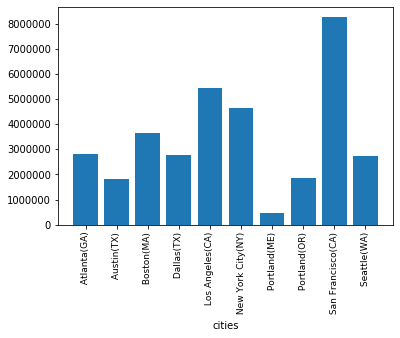

In [73]:
''''city=all_data['City]'.unique()'''
cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=9)
plt.xlabel("cities")

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [74]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

In [76]:
all_data["Hour"]=all_data["Order Date"].dt.hour

In [77]:
all_data["Minute"]=all_data["Order Date"].dt.minute

In [78]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.000000,New York City(NY),0,1
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.000000,New York City(NY),7,3
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.950000,New York City(NY),18,21
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco(CA),15,13
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta(GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.990000,Boston(MA),19,2
186846,222906,27in FHD Monitor,1,149.990005,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.990005,New York City(NY),19,29
186847,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco(CA),18,57
186848,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco(CA),18,35


In [79]:
hours=[hour for hour,df in all_data.groupby("Hour")]

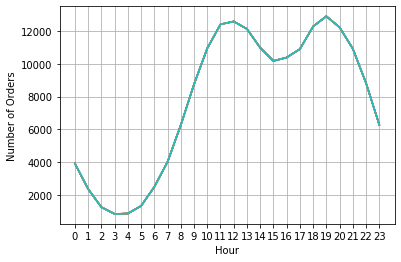

In [97]:
plt.plot(hours,all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

### What products are most often sold together

In [98]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [111]:
Group=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df.copy()

In [112]:
df['Grouped']=Group

In [131]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [134]:
from itertools import combinations
from collections import Counter

In [135]:
count=Counter()

In [141]:
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2010
('Google Phone', 'USB-C Charging Cable') 1974
('iPhone', 'Wired Headphones') 894
('Google Phone', 'Wired Headphones') 828
('Vareebadd Phone', 'USB-C Charging Cable') 722
('iPhone', 'Apple Airpods Headphones') 720
('Google Phone', 'Bose SoundSport Headphones') 440
('USB-C Charging Cable', 'Wired Headphones') 320
('Vareebadd Phone', 'Wired Headphones') 286
('Lightning Charging Cable', 'Wired Headphones') 184


### What product sold the most

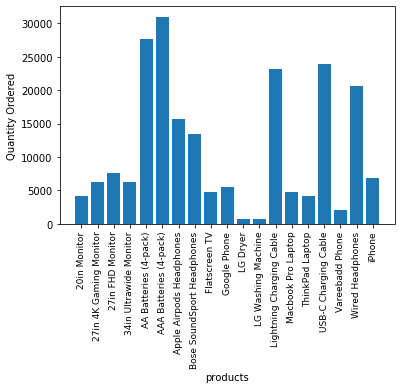

In [149]:
product_group=all_data.groupby('Product')
quantity_ordred=product_group.sum()['Quantity Ordered']
products=[product for product,df in product_group]
plt.bar(products,quantity_ordred)
plt.xticks(products,rotation='vertical',size=9)
plt.xlabel("products")
plt.ylabel("Quantity Ordered")
plt.show()

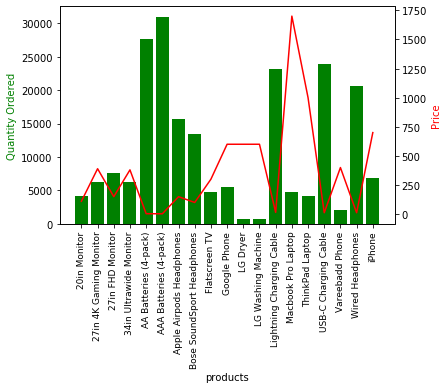

In [164]:
prices=all_data.groupby('Product').mean()['Price Each']
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordred,color='g')
ax2.plot(products,prices,'r-')

ax1.set_xlabel("products")
ax1.set_ylabel("Quantity Ordered",color='g')
ax2.set_ylabel("Price",color='r')
ax1.set_xticklabels(products,rotation='vertical',size=9)
plt.show()